# Perkenalan

Nama: Made Ary Widanthi <br>
Batch: FTDS 020 RMT<br>
Dataset: Churd data<br>
Objective: Sebuah perusahaan ingin meminimalisir resiko seorang customer untuk berhenti memakai produk yang mereka tawarkan. Bantulah perusahaan tersebut untuk memprediksi customer yang akan berhenti (churn) dari dataset yang diberikan.

# Import Libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
!pip install feature-engine
from feature_engine.outliers import Winsorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [180]:
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

# Data Loading

In [42]:
data = pd.read_csv('churn.csv')

# Show first 10 rows of data
data.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [43]:
data.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [45]:
data.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


In [46]:
df = data.copy()

# Exploratory Data Analysis

In [47]:
num_cols = list(data.select_dtypes(np.number))
cat_cols = list(data.select_dtypes('object'))

print('numeric:', num_cols)
print('categoric:', cat_cols)

numeric: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']
categoric: ['user_id', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [48]:
for columns in data:
  print(columns,":", data[columns].unique(),"\n")

user_id : ['9f420209e7d129f3' 'ac6e97806267549e' 'a6aa19b1580eed4e' ...
 '9329a6297407334a' 'a4403ddda8fcf9f3' '93b5d0330d24fa15'] 

age : [29 50 26 63 64 35 43 15 49 53 33 24 36 23 40 27 48 54 62 28 59 19 18 47
 32 57 52 61 12 30 22 41 58 60 11 17 14 51 39 56 34 16 21 10 55 13 25 46
 20 44 31 38 37 42 45] 

gender : ['F' 'M' nan] 

region_category : [nan 'City' 'Village' 'Town'] 

membership_category : ['No Membership' 'Basic Membership' 'Silver Membership'
 'Premium Membership' 'Gold Membership' 'Platinum Membership'] 

joining_date : ['2017-04-05' '2017-03-31' '2017-02-11' ... '2015-04-08' '2015-08-06'
 '2015-01-20'] 

joined_through_referral : ['Yes' nan 'No'] 

preferred_offer_types : ['Without Offers' 'Credit/Debit Card Offers' 'Gift Vouchers/Coupons' nan] 

medium_of_operation : [nan 'Desktop' 'Smartphone' 'Both'] 

internet_option : ['Wi-Fi' 'Fiber_Optic' 'Mobile_Data'] 

last_visit_time : ['22:29:49' '15:44:56' '20:31:53' ... '09:32:50' '02:28:52' '17:50:38'] 

days_since_last

In [49]:
#membuat function untuk visualisasi
def eda (x):
  data_chek = data.groupby([x, 'churn_risk_score']).size().reset_index(name='count')
  ax = sns.barplot(x=x, y='count', hue='churn_risk_score', data=data_chek, palette='mako', errwidth=0)
  plt.xticks(rotation = 'vertical')
  plt.show()

In [50]:
# mengkategorikan umur agar lebih mudah mengambil insight data
bins = [10,21,45,64]

labels = ['10-20','21-45','46-64']
data['age_category'] = pd.cut(data['age'], bins=bins, labels=labels)

data.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,age_category
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1,21-45
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1,46-64
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0,21-45
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1,46-64
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0,46-64


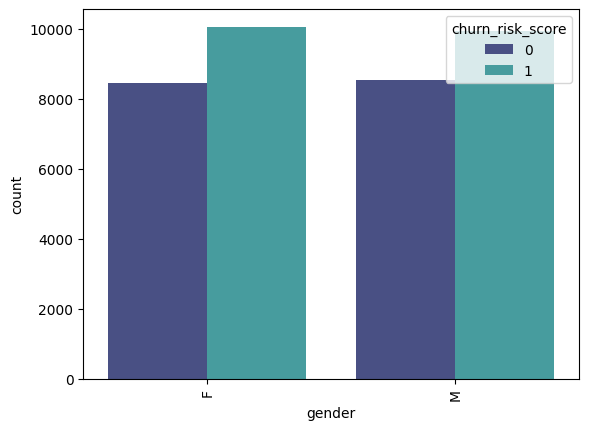

gender None


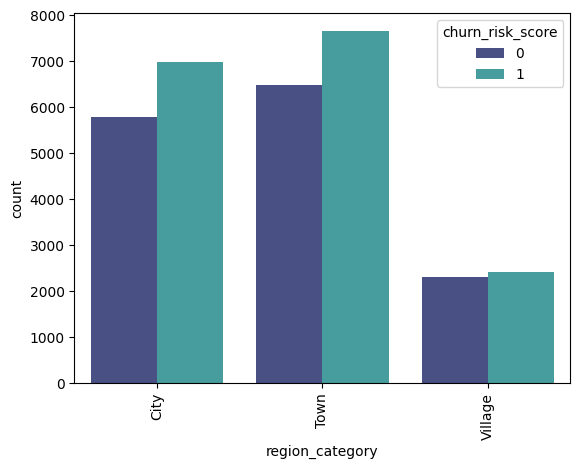

region_category None


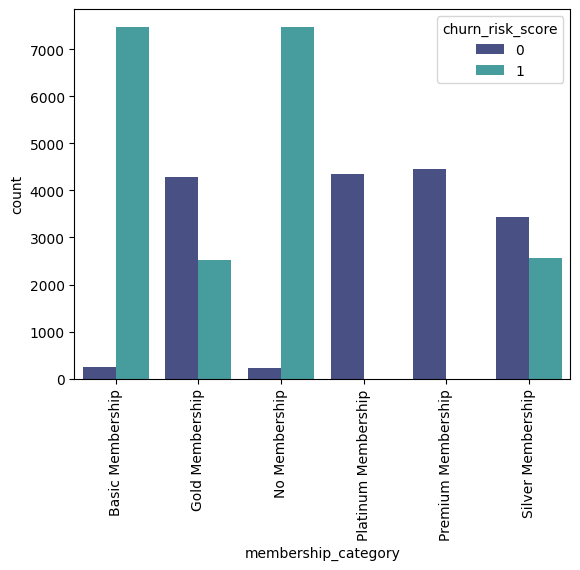

membership_category None


In [51]:
# Visualisasi untuk demographic
for column in data[['gender', 'region_category','membership_category']]:
  print(column, eda(column))

Berdasarkan demographic dari user, tingkat churn termasuk tinggi dan dialami oleh laki-laki dan perempuan yang mayoritas berasal dari kota. Dan tingkat churn tertinggi merupakan user yang bukan member dan memiliki basic membership

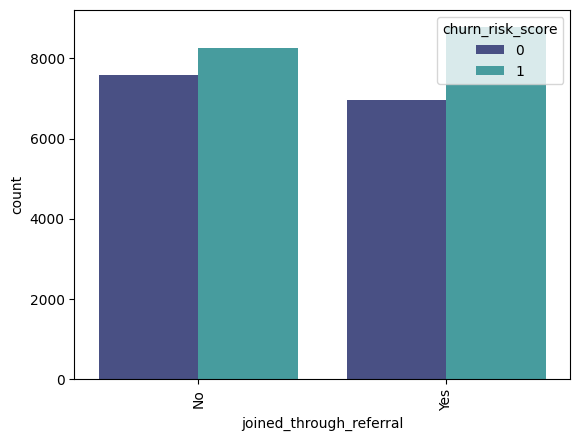

joined_through_referral None


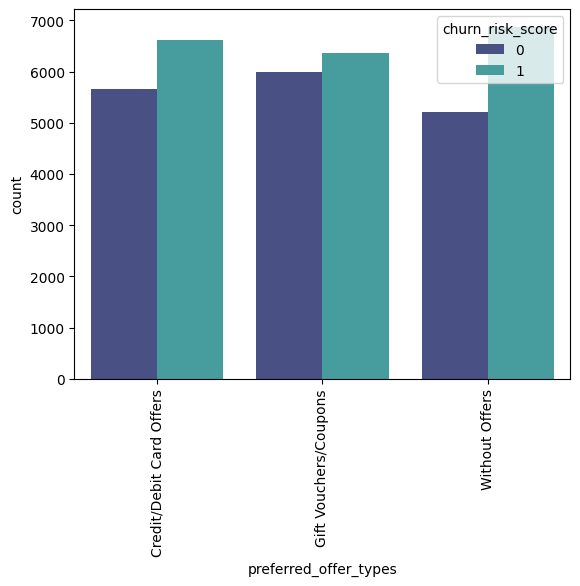

preferred_offer_types None


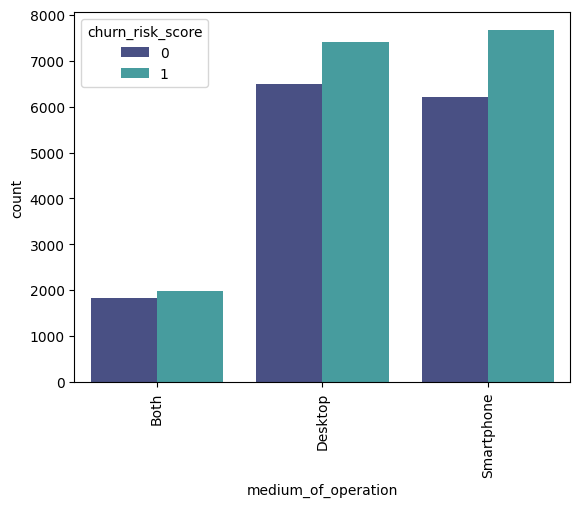

medium_of_operation None


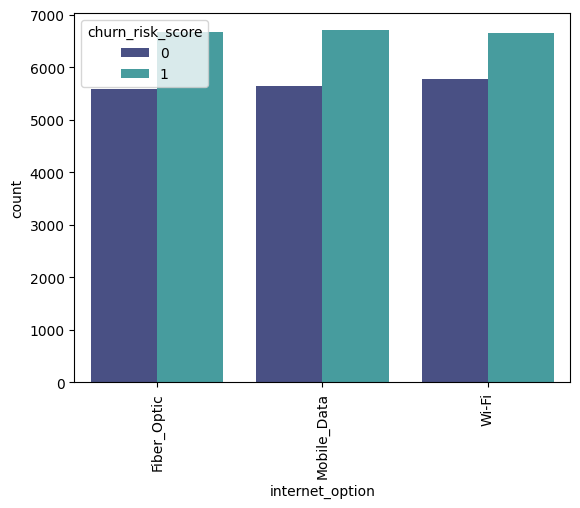

internet_option None


In [52]:
#visualisasi untuk tipe user
for column in data[['joined_through_referral', 'preferred_offer_types','medium_of_operation','internet_option']]:
  print(column, eda(column))

Users who join using referrals or without them still have a consistently high churn rate, even after being offered various promotions through credit/debit, vouchers, and without any offers. And mostly users accessing the website using desktop or smartphone with mobile data, wifi, and fiber optic networks also experience a high churn rate.

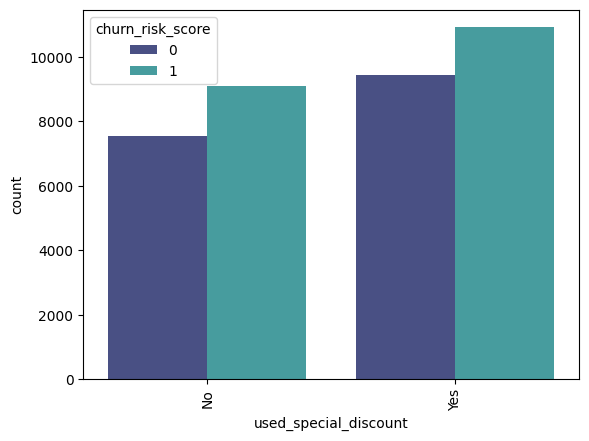

used_special_discount None


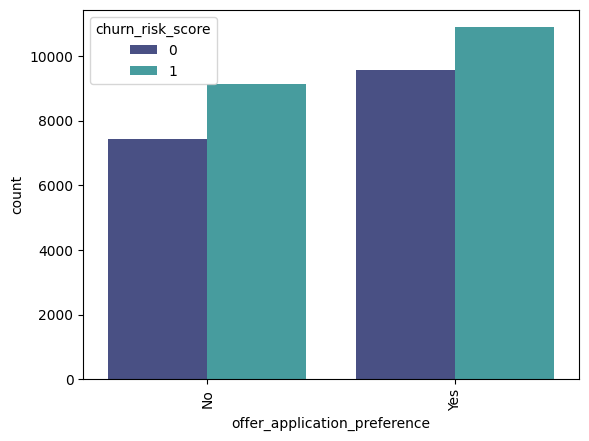

offer_application_preference None


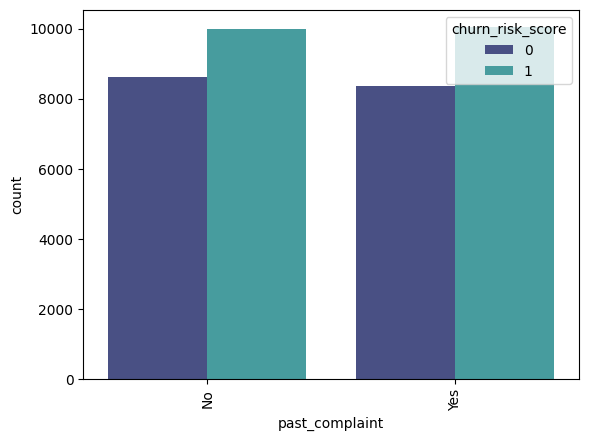

past_complaint None


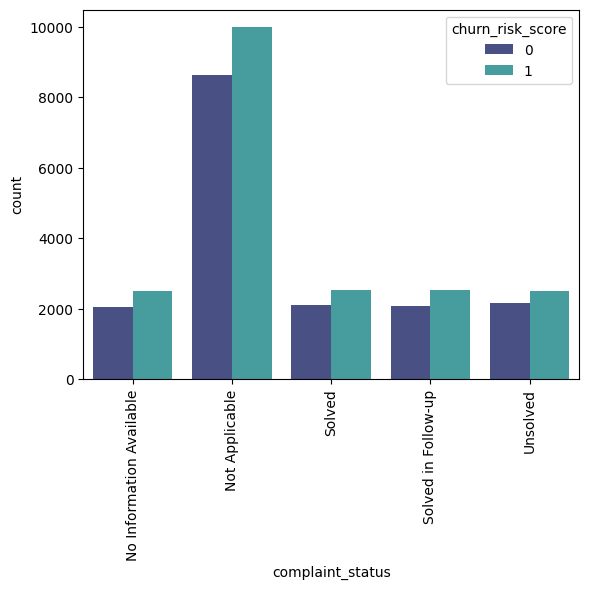

complaint_status None


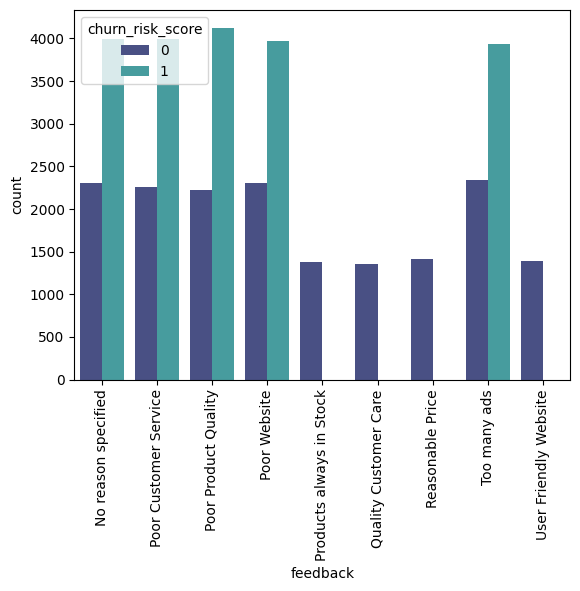

feedback None


In [53]:
#visualisasi untuk tipe user
for column in data[['used_special_discount', 'offer_application_preference','past_complaint','complaint_status', 'feedback']]:
  print(column, eda(column))

Users who use special discounts and offer application preferences are more likely to churn, regardless of whether they have complaints or not. Feedback from users also indicates a lot of negative responses to the website's performance.

In [54]:
def plot (x):
  plt.subplot(1,1,1)
  sns.kdeplot(x=x, hue='churn_risk_score', palette = 'Set2', shade=True, data=data)
  plt.show()

<ipython-input-54-ec0ea599e6e4>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, hue='churn_risk_score', palette = 'Set2', shade=True, data=data)


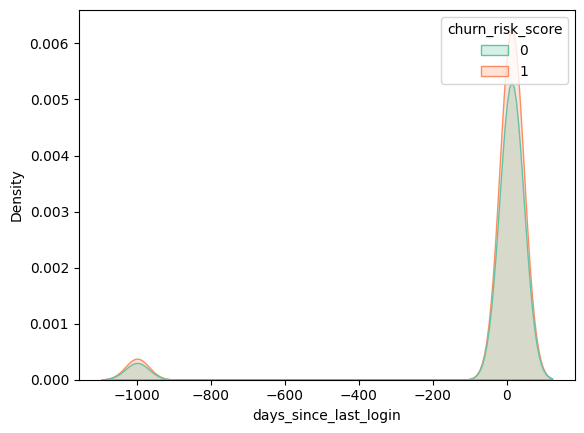

days_since_last_login None


<ipython-input-54-ec0ea599e6e4>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, hue='churn_risk_score', palette = 'Set2', shade=True, data=data)


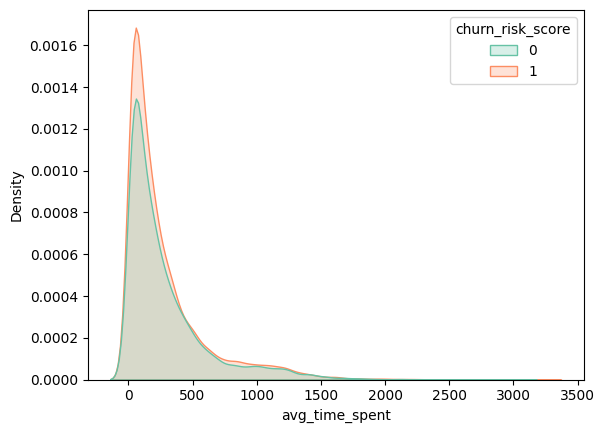

avg_time_spent None


<ipython-input-54-ec0ea599e6e4>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, hue='churn_risk_score', palette = 'Set2', shade=True, data=data)


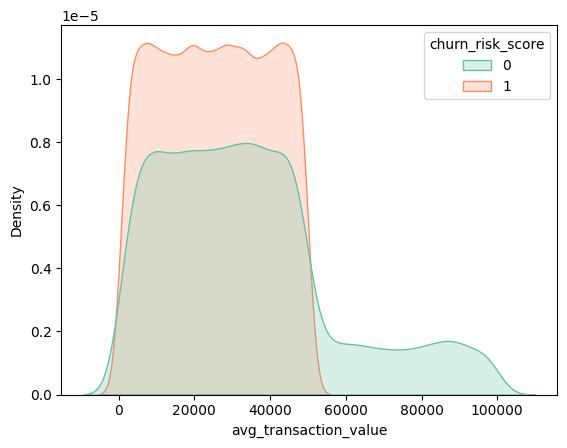

avg_transaction_value None


<ipython-input-54-ec0ea599e6e4>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, hue='churn_risk_score', palette = 'Set2', shade=True, data=data)


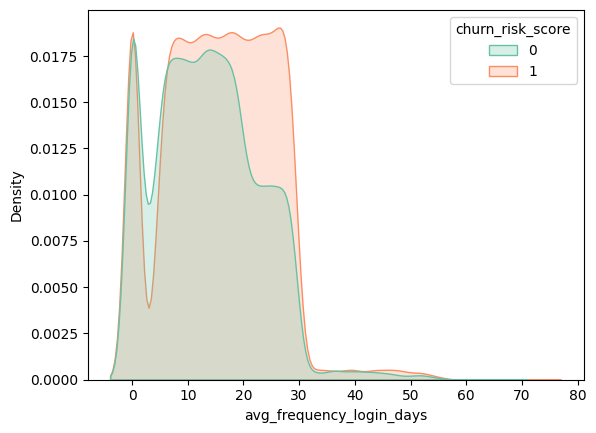

avg_frequency_login_days None


<ipython-input-54-ec0ea599e6e4>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, hue='churn_risk_score', palette = 'Set2', shade=True, data=data)


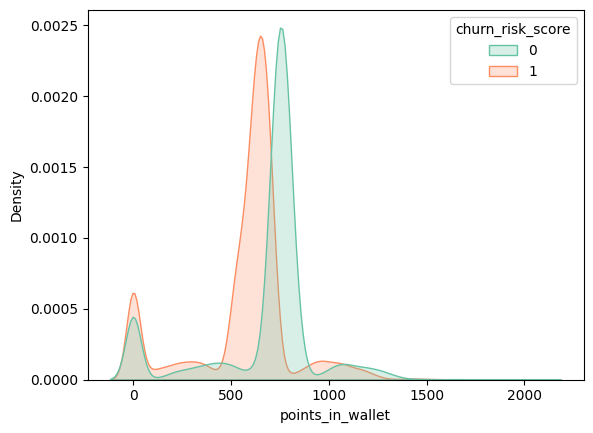

points_in_wallet None


In [55]:
for column in data[['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']]:
  print(column, plot(column))

Users who perform transactions below 58000 are most likely to churn, and these users are frequently use the website.

In [56]:
data['joining_date'] = pd.to_datetime(data['joining_date'])

<ipython-input-57-e1a7b4b09638>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='joining_date', hue='churn_risk_score', palette = 'Set2', shade=True, data=data)


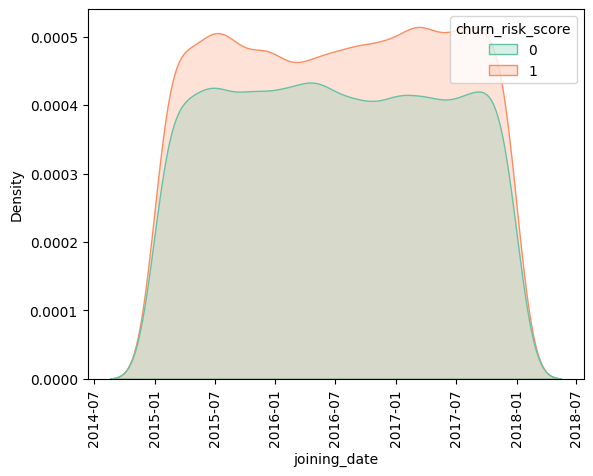

In [57]:
  plt.subplot(1,1,1)
  sns.kdeplot(x='joining_date', hue='churn_risk_score', palette = 'Set2', shade=True, data=data)
  plt.xticks(rotation='vertical')
  plt.show()

Between 2014 and 2018, the number of users who churned on the website exceeded the number of users who remained active.

# Feature Engineering

## Splitting between Train-Set, Val-Set, and Test-Set

In [58]:
# Splitting between `X` and `y`

X = df.drop(['churn_risk_score', 'user_id'], axis=1)
y = df['churn_risk_score']

In [59]:
# Splitting between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=20)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (26739, 20)
Val Size :  (4719, 20)
Test Size :  (5552, 20)


## Handle Missing Values

In [60]:
X_train.isna().sum()

age                                0
gender                            43
region_category                 3848
membership_category                0
joining_date                       0
joined_through_referral         3884
preferred_offer_types            211
medium_of_operation             3894
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [61]:
X_test.isna().sum()

age                               0
gender                            8
region_category                 857
membership_category               0
joining_date                      0
joined_through_referral         840
preferred_offer_types            38
medium_of_operation             810
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

In [62]:
X_train_val.isna().sum()

age                                0
gender                            51
region_category                 4574
membership_category                0
joining_date                       0
joined_through_referral         4602
preferred_offer_types            250
medium_of_operation             4585
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [63]:
df['gender'].value_counts()

F    18497
M    18454
Name: gender, dtype: int64

In [64]:
age = df[df['gender'].isna()]
age

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
22,be55c26b06eeb561,54,NaN,City,Basic Membership,2017-03-18,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,156.07000,32463.61,16.000000,639.820000,Yes,No,Yes,No Information Available,Poor Product Quality,1
145,a159641a5f8deac9,47,NaN,Town,Silver Membership,2015-04-20,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,262.65000,35934.73,19.000000,784.300000,Yes,Yes,Yes,Solved,Poor Website,0
728,b85b3149c460cd02,40,NaN,City,Silver Membership,2017-01-01,No,Without Offers,Desktop,Mobile_Data,...,333.25000,21440.09,18.000000,749.310000,Yes,No,No,Not Applicable,Products always in Stock,0
2304,94070fc001e5d60b,23,NaN,Village,Premium Membership,2017-10-28,Yes,Gift Vouchers/Coupons,NaN,Wi-Fi,...,93.88000,38875.53,22.000000,1181.889841,Yes,No,Yes,Unsolved,Poor Website,0
2586,8f54a6a4f89f7305,41,NaN,City,No Membership,2016-11-05,Yes,Without Offers,NaN,Fiber_Optic,...,52.11000,28298.29,6.000000,548.630000,No,Yes,Yes,Unsolved,Poor Product Quality,1
3926,8ace27a9d93861b0,13,NaN,Town,No Membership,2016-09-18,NaN,Credit/Debit Card Offers,Smartphone,Fiber_Optic,...,549.90000,15737.81,9.000000,573.000000,No,Yes,Yes,Unsolved,Too many ads,1
4023,9518edceea074d43,26,NaN,City,Basic Membership,2017-05-07,NaN,Without Offers,Smartphone,Wi-Fi,...,259.82000,21380.00,0.000000,0.000000,No,Yes,No,Not Applicable,Poor Website,1
4328,8c8af015fb0c05cd,52,NaN,Town,Gold Membership,2017-08-03,Yes,Gift Vouchers/Coupons,NaN,Mobile_Data,...,128.28000,15277.33,28.000000,787.840000,Yes,No,Yes,Solved,Poor Customer Service,0
5912,8d67e181f8dac02a,53,NaN,Village,Basic Membership,2015-09-13,Yes,Gift Vouchers/Coupons,NaN,Mobile_Data,...,650.07000,26235.35,0.000000,532.600000,No,Yes,Yes,No Information Available,No reason specified,1
5979,b0eff1eecbf9eb56,18,NaN,NaN,Platinum Membership,2015-12-15,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,221.57000,12808.70,7.000000,0.000000,Yes,No,Yes,Solved in Follow-up,No reason specified,0


In [65]:
def missing_check(x, data):
    sns.countplot(x=x, data=data)
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.title(f'Count of {x}')
    plt.xticks(rotation='vertical')
    plt.show()

complaint_status


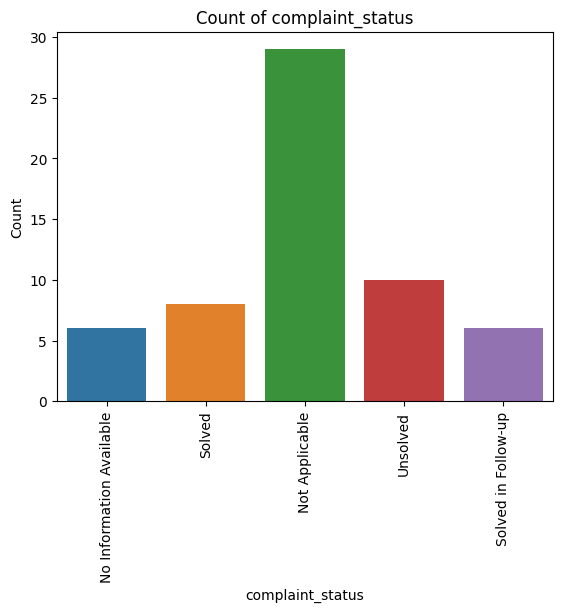

feedback


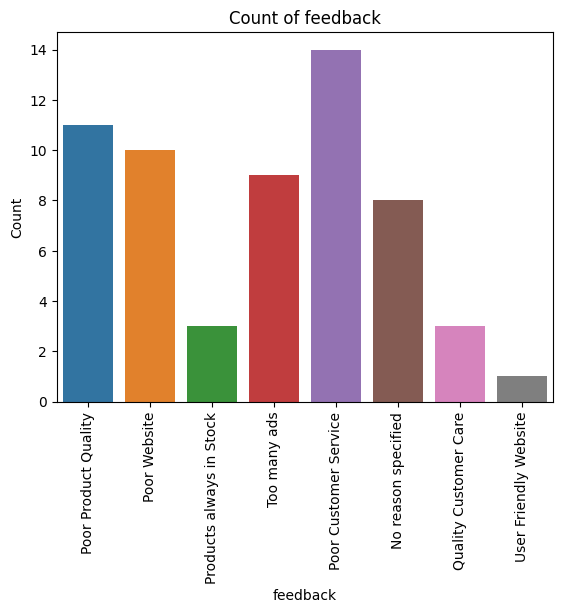

In [66]:
for columns in age[['complaint_status', 'feedback']]:
  print(columns)
  missing_check(columns, age)

In my personal opinion, these missing values are considered missing at random because they have a correlation with other variables, namely "feedback" and "complaint_status." Based on the graph, users who did not fill in the "age" column mostly have complaint statuses that are unresolved and provide negative feedback on the website and seller's services.

The method I will use for handling these missing values is mode imputation.

In [67]:
mode_value = X_train['gender'].mode().values[0]
X_train['gender'].fillna(mode_value, inplace=True)
X_test['gender'].fillna(mode_value, inplace=True)
X_val['gender'].fillna(mode_value, inplace=True)

In [68]:
region = df[df['region_category'].isna()]
region

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.480000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.970000,Yes,No,Yes,No Information Available,Poor Customer Service,1
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.30,13160.39,24.0,712.940000,Yes,No,No,Not Applicable,No reason specified,1
10,a23f0c8e2f275bc5,53,F,NaN,Basic Membership,2015-09-02,Yes,Gift Vouchers/Coupons,NaN,Fiber_Optic,...,39.85,24087.96,10.0,656.380000,Yes,No,No,Not Applicable,No reason specified,1
13,8a2770c75d7ca0f3,33,M,NaN,No Membership,2016-01-25,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,...,142.85,9854.95,15.0,1357.366572,No,Yes,No,Not Applicable,Poor Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36984,9814f1d3a7bc587c,12,F,NaN,Basic Membership,2017-02-17,Yes,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,41.10,37677.31,9.0,561.200000,Yes,No,No,Not Applicable,No reason specified,1
36988,9afb485363a32b12,45,F,NaN,Gold Membership,2016-02-20,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,...,30.79,43048.44,12.0,689.440000,No,Yes,No,Not Applicable,Poor Website,1
36991,a6f0555c497dad8c,50,M,NaN,Silver Membership,2017-03-11,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,...,31.39,41364.87,10.0,744.750000,Yes,No,Yes,No Information Available,Too many ads,0
36996,87b2cfb9c6df3e13,63,F,NaN,Gold Membership,2015-09-10,Yes,Without Offers,Smartphone,Mobile_Data,...,105.90,21985.81,27.0,603.350000,No,Yes,Yes,Solved,Too many ads,1


There are 14.6% missing values in the "region_category" data. Since these missing values are considered missing completely at random and the amount of missing data is >10%, I will choose to drop the "region" column. Additionally, the unique values in the "region" column are town, city, and village, which do not indicate specific target areas and do not provide highly useful insights for the churn rate.

In [69]:
X_train = X_train.drop(['region_category'],axis=1)
X_val = X_val.drop(['region_category'],axis=1)
X_test = X_test.drop(['region_category'],axis=1)

In [70]:
referral = df[df['joined_through_referral'].isna()]
referral

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
12,8578cd74b0eb2c83,24,F,Village,Silver Membership,2016-04-05,NaN,Without Offers,Smartphone,Mobile_Data,...,160.270000,49607.97,20.0,0.00,No,Yes,Yes,Solved,Too many ads,1
16,b1807a7cb1c66671,63,M,NaN,Silver Membership,2015-06-13,NaN,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,92.070000,21395.38,26.0,667.71,No,Yes,No,Not Applicable,Too many ads,1
19,a19f84a19e38e20c,40,M,City,No Membership,2015-05-05,NaN,Without Offers,Desktop,Wi-Fi,...,119.120000,4384.76,8.0,0.00,Yes,No,Yes,Solved,Too many ads,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36998,bbb3a45b217bd6d9,18,F,Town,Premium Membership,2016-05-29,NaN,Without Offers,Smartphone,Mobile_Data,...,401.110000,61048.95,9.0,787.61,Yes,Yes,No,Not Applicable,User Friendly Website,0
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.83,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.01,Yes,No,No,Not Applicable,Poor Customer Service,1
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0


complaint_status


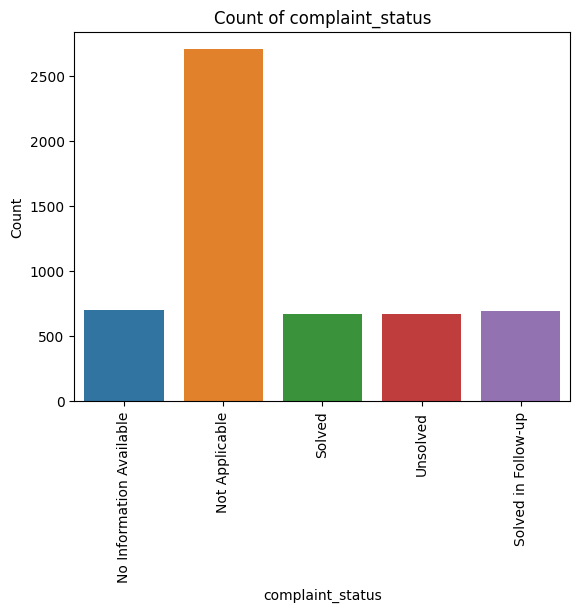

feedback


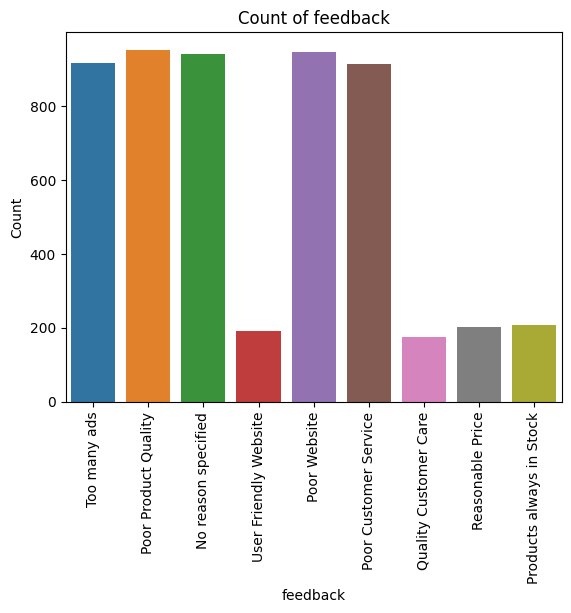

In [71]:
for i in referral[['complaint_status','feedback']]:
  print(i)
  missing_check(i, referral)

In my personal opinion, referrals can be a significant factor in the churn rate because their purpose is to enhance customer loyalty by providing rewards for "referring friends" to use the offered products. However, the reviews from those referrals may not necessarily be positive. This can be observed from the majority of feedback and complaint statuses, which indicate negative comments.

Because there are 10.5% missing data in referral column, I decide to drop the column

In [72]:
X_train = X_train.drop(['joined_through_referral'],axis=1)
X_val = X_val.drop(['joined_through_referral'],axis=1)
X_test = X_test.drop(['joined_through_referral'],axis=1)

In [73]:
X_train.isna().sum()

age                                0
gender                             0
membership_category                0
joining_date                       0
preferred_offer_types            211
medium_of_operation             3894
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       37010 non-null  object        
 1   age                           37010 non-null  int64         
 2   gender                        36951 non-null  object        
 3   region_category               31579 non-null  object        
 4   membership_category           37010 non-null  object        
 5   joining_date                  37010 non-null  datetime64[ns]
 6   joined_through_referral       31568 non-null  object        
 7   preferred_offer_types         36722 non-null  object        
 8   medium_of_operation           31615 non-null  object        
 9   internet_option               37010 non-null  object        
 10  last_visit_time               37010 non-null  object        
 11  days_since_last_login       

In [75]:
offer = X_train[X_train['preferred_offer_types'].isna()]
offer

,age,gender,membership_category,joining_date,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
11566,46,F,Gold Membership,2015-02-13,NaN,Smartphone,Mobile_Data,20:34:33,13,1983.50,7073.63,29.000000,720.257798,Yes,No,Yes,Solved in Follow-up,Too many ads
20898,13,M,Silver Membership,2017-09-07,NaN,Desktop,Mobile_Data,18:46:52,6,514.39,45498.92,25.000000,704.090000,No,Yes,No,Not Applicable,Poor Customer Service
21575,56,M,No Membership,2015-09-14,NaN,Smartphone,Mobile_Data,11:20:11,10,263.62,11435.15,13.000000,666.170000,Yes,Yes,Yes,Solved in Follow-up,No reason specified
23576,53,F,Gold Membership,2017-01-24,NaN,Desktop,Mobile_Data,18:12:50,12,84.43,30761.37,1.760559,712.280000,No,Yes,No,Not Applicable,Poor Customer Service
17548,21,F,No Membership,2017-07-25,NaN,Smartphone,Mobile_Data,23:39:38,11,694.49,28992.13,53.123340,668.390000,Yes,Yes,No,Not Applicable,Poor Customer Service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,60,F,No Membership,2016-02-12,NaN,Both,Fiber_Optic,12:54:39,7,549.52,40958.02,21.000000,550.910000,Yes,No,Yes,Unsolved,Poor Website
12730,36,M,Platinum Membership,2016-09-05,NaN,NaN,Wi-Fi,15:51:03,2,68.85,30504.19,0.000000,715.220000,No,Yes,No,Not Applicable,Poor Customer Service
28570,55,F,Platinum Membership,2017-05-20,NaN,Smartphone,Mobile_Data,01:04:59,7,346.33,76523.23,9.000000,1046.126166,Yes,No,Yes,Solved in Follow-up,User Friendly Website
22696,58,M,Basic Membership,2016-01-31,NaN,Smartphone,Wi-Fi,19:01:53,21,0.00,32679.85,0.000000,646.190000,Yes,No,Yes,No Information Available,Poor Product Quality


In [76]:
offer_value = X_train['preferred_offer_types'].mode().values[0]
X_train['preferred_offer_types'].fillna(offer_value, inplace=True)
X_test['preferred_offer_types'].fillna(offer_value, inplace=True)
X_val['preferred_offer_types'].fillna(offer_value, inplace=True)

Becaue only 0,5% data that missing, so I decided to use mode imputation method.

In [77]:
X_train['medium_of_operation'].value_counts()

Desktop       10144
Smartphone     9964
Both           2737
Name: medium_of_operation, dtype: int64

In [78]:
medium = X_train[X_train['medium_of_operation'].isna()]
medium

,age,gender,membership_category,joining_date,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
4013,48,M,Basic Membership,2015-06-08,Credit/Debit Card Offers,NaN,Mobile_Data,01:06:26,15,30.75,19112.92,0.000000,692.250000,Yes,No,No,Not Applicable,Too many ads
4166,19,F,Platinum Membership,2016-03-06,Credit/Debit Card Offers,NaN,Wi-Fi,17:21:21,22,75.28,33145.98,13.000000,0.000000,Yes,No,No,Not Applicable,Too many ads
96,28,M,Silver Membership,2015-07-13,Without Offers,NaN,Mobile_Data,04:26:05,20,34.14,1575.05,42.656317,754.240000,Yes,No,No,Not Applicable,Poor Product Quality
34991,55,M,Premium Membership,2015-03-06,Without Offers,NaN,Mobile_Data,12:56:17,18,57.09,47619.65,21.000000,785.510000,Yes,No,No,Not Applicable,Poor Website
20575,31,M,Premium Membership,2015-08-06,Credit/Debit Card Offers,NaN,Fiber_Optic,01:02:04,22,182.35,88444.61,2.000000,831.140000,No,Yes,No,Not Applicable,Reasonable Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36742,30,F,Silver Membership,2016-12-19,Credit/Debit Card Offers,NaN,Mobile_Data,05:02:39,11,583.71,40885.30,14.000000,1008.103567,No,Yes,No,Not Applicable,Poor Website
17032,36,M,No Membership,2017-09-21,Gift Vouchers/Coupons,NaN,Mobile_Data,06:11:49,15,236.96,13269.55,21.000000,0.000000,Yes,No,No,Not Applicable,Poor Website
36735,34,M,Basic Membership,2016-07-11,Gift Vouchers/Coupons,NaN,Fiber_Optic,09:20:26,7,60.73,27534.68,28.000000,104.605732,Yes,No,Yes,Solved,Poor Website
1653,10,M,Basic Membership,2017-11-12,Gift Vouchers/Coupons,NaN,Fiber_Optic,07:24:08,6,254.61,48034.14,26.000000,967.635720,Yes,No,Yes,Solved,No reason specified


In my personal opinion, the "medium operation" column can be very useful in understanding the performance of the website on desktop or smartphone. However, since the amount of missing data is more than 10%, I have decided to drop it to avoid any biases in the data.

In [80]:
X_train = X_train.drop(['medium_of_operation'],axis=1)
X_val = X_val.drop(['medium_of_operation'],axis=1)
X_test = X_test.drop(['medium_of_operation'],axis=1)

## Handle Outlier

In [81]:
X_train.skew()

<ipython-input-81-2b4a9c51a775>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.skew()


age                        -0.009775
days_since_last_login      -3.987155
avg_time_spent              2.266367
avg_transaction_value       1.014448
avg_frequency_login_days    0.392028
points_in_wallet           -0.775464
dtype: float64

In [82]:
def boxplot (variable):
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

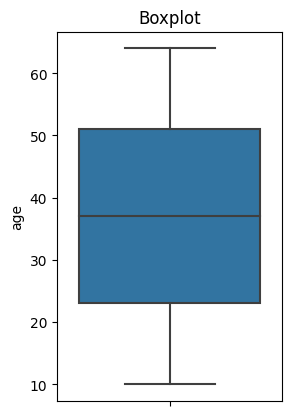

age : None


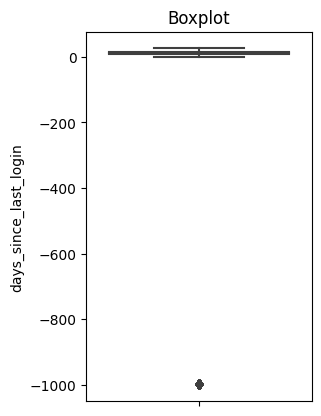

days_since_last_login : None


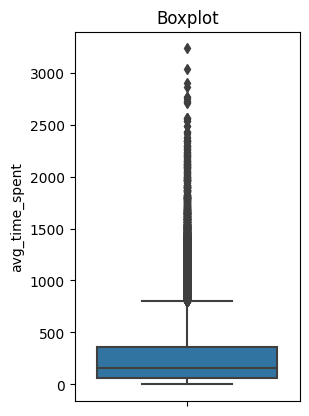

avg_time_spent : None


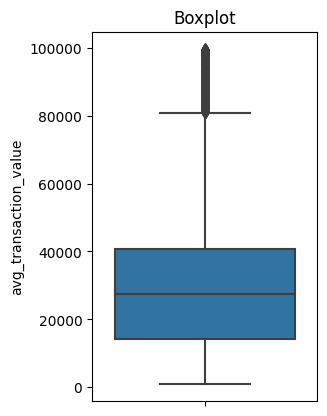

avg_transaction_value : None


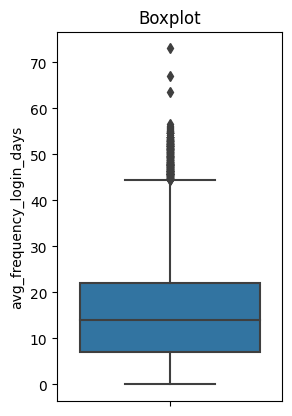

avg_frequency_login_days : None


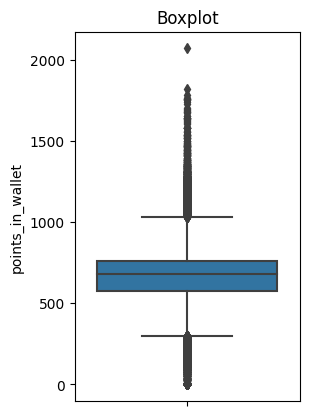

points_in_wallet : None


<ipython-input-83-ca1fbddb456b>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.skew()


age                        -0.009775
days_since_last_login      -3.987155
avg_time_spent              2.266367
avg_transaction_value       1.014448
avg_frequency_login_days    0.392028
points_in_wallet           -0.775464
dtype: float64

In [83]:
for i in X_train[['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet',]]:
  print(i, ":", boxplot(i))
X_train.skew()

Based on the box plot and data skewness, all features can be considered non-normally distributed.

In [84]:
# Membuat fungsi untuk mencari batas atas dan batas bawah
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [85]:
for column in ['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet']:
  print("Upper dan lower boundary dari kolom",column, ":", find_skewed_boundaries(X_train, column , 1.5))

Upper dan lower boundary dari kolom age : (93.0, -19.0)
Upper dan lower boundary dari kolom days_since_last_login : (28.0, -4.0)
Upper dan lower boundary dari kolom avg_time_spent : (805.865, -386.93499999999995)
Upper dan lower boundary dari kolom avg_transaction_value : (80993.14250000002, -25902.557500000003)
Upper dan lower boundary dari kolom avg_frequency_login_days : (44.5, -15.5)
Upper dan lower boundary dari kolom points_in_wallet : (1031.3449999999998, 301.54500000000013)


In [86]:
for column in ['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet'] :
    upper_boundary, lower_boundary = find_skewed_boundaries(X_train, column, 1.5)
    outliers = X_train[X_train[column] > upper_boundary]
    print('Total data outliers in {}: {}'.format(column, len(outliers)))


Total data outliers in age: 0
Total data outliers in days_since_last_login: 0
Total data outliers in avg_time_spent: 2267
Total data outliers in avg_transaction_value: 820
Total data outliers in avg_frequency_login_days: 192
Total data outliers in points_in_wallet: 1312


### Cencoring

In [96]:
# Get Numeric Columns and Cetogory Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num columns', num_columns)
print('Cat columns', cat_columns)

Num columns ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Cat columns ['gender', 'membership_category', 'joining_date', 'preferred_offer_types', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [97]:
# Split Trains-Set and Test-Set based on Column types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
30811,33,14,326.43,38026.7800,8.000000,728.199859
32377,40,13,144.60,41787.3700,14.000000,753.930000
12296,42,21,225.90,35794.3400,14.000000,330.257449
4013,48,15,30.75,19112.9200,0.000000,692.250000
30702,55,23,122.35,8333.8800,19.000000,301.545000
...,...,...,...,...,...,...
2844,41,23,41.06,8433.8100,11.000000,635.460000
9288,32,4,177.73,2099.7700,13.000000,798.700000
32919,26,13,0.00,33464.7500,2.614214,646.860000
7756,45,23,206.31,80993.1425,6.000000,776.720000


In [98]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr',
                          tail='both',
                          fold=1.5,
                          variables=['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet',])
windsoriser.fit(X_train)

data_after = windsoriser.transform(X_train)

In [99]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'age': -19.0, 'days_since_last_login': -4.0, 'avg_time_spent': -386.93499999999995, 'avg_transaction_value': -25902.557500000003, 'avg_frequency_login_days': -15.5, 'points_in_wallet': 301.54500000000013}
Right Tail Caps :  {'age': 93.0, 'days_since_last_login': 28.0, 'avg_time_spent': 805.865, 'avg_transaction_value': 80993.14250000002, 'avg_frequency_login_days': 44.5, 'points_in_wallet': 1031.3449999999998}


In [100]:
print('Data - Before Capping')
print(X_train_num.describe())
print('')
print('Data - After Capping')
print(data_after.describe())

Data - Before Capping
                age  days_since_last_login  avg_time_spent  \
count  26739.000000           26739.000000    26739.000000   
mean      37.113168              11.871499      250.784368   
std       15.847589               6.590652      242.113241   
min       10.000000              -4.000000        0.000000   
25%       23.000000               8.000000       60.365000   
50%       37.000000              12.000000      163.340000   
75%       51.000000              16.000000      358.565000   
max       64.000000              26.000000      805.865000   

       avg_transaction_value  avg_frequency_login_days  points_in_wallet  
count           26739.000000              26739.000000      26739.000000  
mean            29061.405964                 14.642205        649.440104  
std             18616.342965                  9.368429        185.488412  
min               804.340000                  0.000000        301.545000  
25%             14183.330000                

In [101]:
# memasukan hasil transform windsorizer pada X_train_num
X_train= windsoriser.transform(X_train)

In [102]:
X_val= windsoriser.transform(X_val)

In [103]:
# memasukan hasil transform windsorizer pada X_test_num
X_test = windsoriser.transform(X_test)

In [104]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(26739, 17)
(4719, 17)
(5552, 17)


##Feature Selection

In [105]:
# creating dummies for income_bracket
target = y_train

# the independent variables set
X = X_train[['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet',]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                    feature       VIF
0                       age  5.212193
1     days_since_last_login  3.744772
2            avg_time_spent  1.995094
3     avg_transaction_value  3.231905
4  avg_frequency_login_days  3.078001
5          points_in_wallet  7.824280


Nilai multikolinearitas > 5 tidak cocok untuk digunakan dalam modeling, yang akan di ambil days_since_last_login, avg_time_spent,avg_transaction_value,avg_frequency_login_days

In [108]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Selecting the categorical features
cat_data = X_train[['gender', 'membership_category','joining_date','preferred_offer_types', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']]
target = y_train

# Convert cat_data to a DataFrame using OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data_encoded = pd.DataFrame(ordinal_encoder.fit_transform(cat_data), columns=cat_data.columns)

# Encode target variable using LabelEncoder
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Feature selection for categorical data
chi_scores_cat = chi2(data_encoded, target_encoded)
p_values_cat = pd.Series(chi_scores_cat[1], index=data_encoded.columns)
p_values_cat.sort_values(ascending=False, inplace=True)
p_values_cat

gender                          9.767930e-01
internet_option                 7.473293e-01
used_special_discount           2.595757e-01
past_complaint                  1.996171e-01
complaint_status                1.724987e-01
offer_application_preference    2.505584e-02
preferred_offer_types           1.183810e-03
joining_date                    1.051302e-62
membership_category             0.000000e+00
last_visit_time                 0.000000e+00
feedback                        0.000000e+00
dtype: float64

A lower p-value generally indicates a more significant association, suggesting that the corresponding features are likely informative for predicting the target.

In the feature selection results, the following features have a p-value <0.05:

1. offer_application_preference
2. preferred_offer_types
3. joining_date

but I'll not use joining date because it has high cardinality

## Pipeline

In [109]:
# Membagi feature kategori dan numerik yang akan di scaling dan encode
numeric_features = X_train[['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days']]
categorical_features = X_train[['preferred_offer_types', 'offer_application_preference']]

In [110]:
# transform kategori dan numerik data menggunakan pipeline
numeric_transformer = Pipeline(steps=[("scaler", MinMaxScaler())])
categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder())])

# Define the column transformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features.columns),
    ("cat", categorical_transformer, categorical_features.columns)
])

In [111]:
# Fit and Transform

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

In [112]:
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(64)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(64)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val)).batch(64)

In [113]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(26739, 9)
(4719, 9)
(5552, 9)


#ANN Training

## Sequential

In [115]:
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [116]:
# Model Definition Sequential API
model_sequential = Sequential()
model_sequential.add(Dense(16,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(9,))) # Hidden Layer 1
model_sequential.add(Dense(8,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_sequential.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [117]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(26739, 9)
(4719, 9)
(5552, 9)


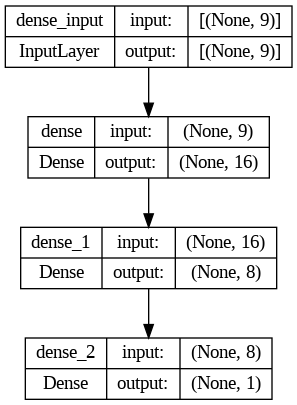

In [118]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

In [119]:
# Train the Model

%%time
history_seq = model_sequential.fit(train_pipe,
                                   epochs=32,
                                   validation_data=(val_pipe))

Epoch 1/32
418/418 [==============================] - 2s 3ms/step - loss: 0.6879 - accuracy: 0.5480 - val_loss: 0.6822 - val_accuracy: 0.5781
Epoch 2/32
418/418 [==============================] - 1s 2ms/step - loss: 0.6777 - accuracy: 0.5903 - val_loss: 0.6703 - val_accuracy: 0.5993
Epoch 3/32
418/418 [==============================] - 1s 3ms/step - loss: 0.6665 - accuracy: 0.5976 - val_loss: 0.6621 - val_accuracy: 0.5948
Epoch 4/32
418/418 [==============================] - 1s 2ms/step - loss: 0.6570 - accuracy: 0.6003 - val_loss: 0.6502 - val_accuracy: 0.6008
Epoch 5/32
418/418 [==============================] - 1s 2ms/step - loss: 0.6458 - accuracy: 0.6053 - val_loss: 0.6421 - val_accuracy: 0.6092
Epoch 6/32
418/418 [==============================] - 1s 2ms/step - loss: 0.6397 - accuracy: 0.6099 - val_loss: 0.6387 - val_accuracy: 0.6107
Epoch 7/32
418/418 [==============================] - 1s 2ms/step - loss: 0.6361 - accuracy: 0.6124 - val_loss: 0.6360 - val_accuracy: 0.6095
Epoch 

In [120]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.687857,0.548038,0.682199,0.578089
1,0.677652,0.590261,0.670283,0.599280
2,0.666468,0.597629,0.662123,0.594829
3,0.657046,0.600284,0.650152,0.600763
4,0.645814,0.605333,0.642146,0.609239
5,0.639664,0.609858,0.638657,0.610723
6,0.636108,0.612364,0.635983,0.609451
7,0.633642,0.614009,0.634329,0.612630
8,0.632119,0.613935,0.633231,0.612842
9,0.631065,0.613299,0.632369,0.612630


###Evaluation

<Axes: >

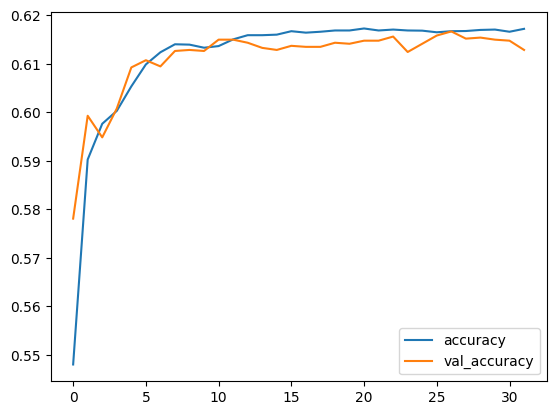

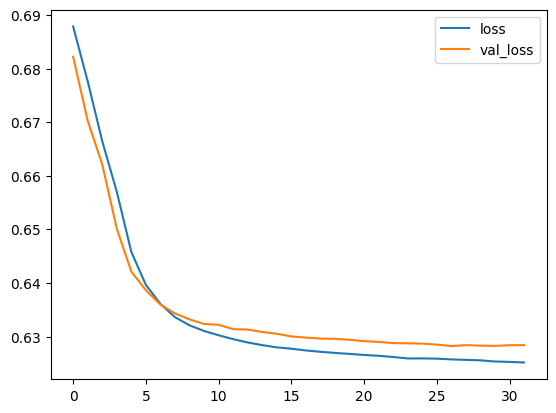

In [121]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

The loss and val_loss values are already good, stable, approaching to 0, but there is a need to improve the accuracy and val_accuracy.

In [124]:
y_pred_seq_train = model_sequential.predict(X_train)
y_pred_seq_train = np.where(y_pred_seq_train >= 0.5, 1, 0)

print(classification_report(y_train, y_pred_seq_train))

836/836 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.19      0.31     12312
           1       0.59      0.98      0.73     14427

    accuracy                           0.62     26739
   macro avg       0.74      0.59      0.52     26739
weighted avg       0.73      0.62      0.54     26739



In [126]:
# Model Evaluation of test-set
y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.89      0.19      0.31      2524
           1       0.59      0.98      0.74      3028

    accuracy                           0.62      5552
   macro avg       0.74      0.58      0.52      5552
weighted avg       0.73      0.62      0.54      5552



This model is considered underfit because it exhibits low accuracy values and the accuracy remains unchanged between the training and test data.

## Functional API

In [127]:
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [133]:
# Create Functional Model

input_layer = Input(shape=(9,))
hidden_layer_1 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 16)           160         ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 8)            136         ['dense_3[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 17)           0           ['input_2[0][0]',                
                                                                  'dense_4[0][0]']          

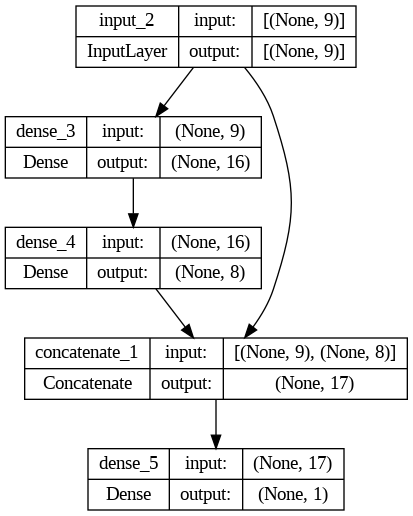

In [134]:
# Plot Layers

tf.keras.utils.plot_model(model_functional, show_shapes=True)

In [135]:
# Train the Model

%%time
history_func = model_functional.fit(train_pipe,
                                    epochs=30,
                                    validation_data=(val_pipe))

Epoch 1/30
418/418 [==============================] - 2s 3ms/step - loss: 0.6810 - accuracy: 0.5855 - val_loss: 0.6734 - val_accuracy: 0.6103
Epoch 2/30
418/418 [==============================] - 1s 2ms/step - loss: 0.6709 - accuracy: 0.6007 - val_loss: 0.6685 - val_accuracy: 0.6029
Epoch 3/30
418/418 [==============================] - 1s 2ms/step - loss: 0.6668 - accuracy: 0.5954 - val_loss: 0.6656 - val_accuracy: 0.5967
Epoch 4/30
418/418 [==============================] - 1s 2ms/step - loss: 0.6644 - accuracy: 0.5927 - val_loss: 0.6639 - val_accuracy: 0.5972
Epoch 5/30
418/418 [==============================] - 1s 2ms/step - loss: 0.6611 - accuracy: 0.5924 - val_loss: 0.6577 - val_accuracy: 0.5978
Epoch 6/30
418/418 [==============================] - 1s 2ms/step - loss: 0.6519 - accuracy: 0.5983 - val_loss: 0.6468 - val_accuracy: 0.6037
Epoch 7/30
418/418 [==============================] - 1s 2ms/step - loss: 0.6423 - accuracy: 0.6053 - val_loss: 0.6400 - val_accuracy: 0.6084
Epoch 

In [136]:
# Create DataFrame

history_func_df = pd.DataFrame(history_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.680954,0.585512,0.673427,0.610299
1,0.670892,0.600733,0.668497,0.602882
2,0.666755,0.595385,0.665615,0.596737
3,0.664416,0.592692,0.663855,0.597160
4,0.661146,0.592431,0.657662,0.597796
5,0.651897,0.598265,0.646802,0.603730
6,0.642274,0.605258,0.640009,0.608392
7,0.636688,0.610307,0.636525,0.609663
8,0.633582,0.611728,0.634126,0.609451
9,0.631683,0.613598,0.632607,0.613054


### Evaluation

<Axes: >

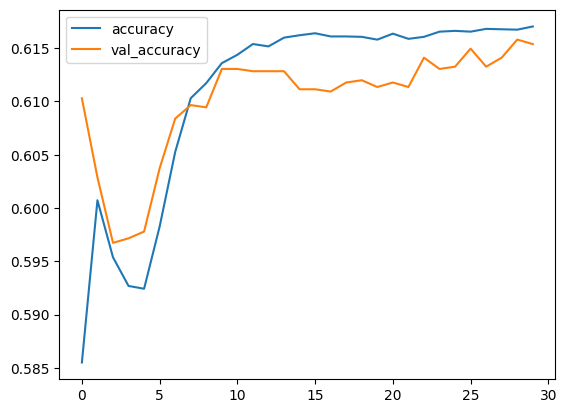

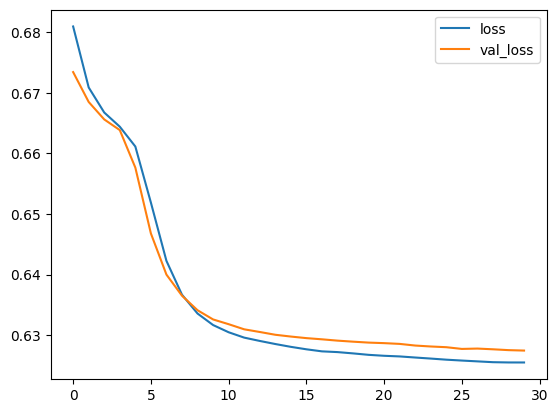

In [137]:
# Plot Training Results

history_func_df[['accuracy', 'val_accuracy']].plot()
history_func_df[['loss', 'val_loss']].plot()

The loss and val_loss are already good, stable, approaching 0, but it is recommended to test by increasing the number of epochs to check the consistency of the model.

In [138]:
y_pred_func_train = model_functional.predict(X_train)
y_pred_func_train = np.where(y_pred_func_train >= 0.5, 1, 0)

print(classification_report(y_train, y_pred_func_train))

836/836 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.18      0.31     12312
           1       0.59      0.99      0.74     14427

    accuracy                           0.62     26739
   macro avg       0.75      0.58      0.52     26739
weighted avg       0.74      0.62      0.54     26739



In [139]:
# Evaluate Test-Set

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func))

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.18      0.31      2524
           1       0.59      0.98      0.74      3028

    accuracy                           0.62      5552
   macro avg       0.75      0.58      0.52      5552
weighted avg       0.74      0.62      0.54      5552



This model is considered underfit because it exhibits low accuracy values and the accuracy remains unchanged between the training and test data.

# ANN Improvement

## Sequential API

In [194]:
seed = 100
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [201]:
# Model Definition Sequential API
model_sequential = Sequential()
model_sequential.add(Dense(16,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed),
                           input_shape=(9,))) # Hidden Layer 1

model_sequential.add(Dense(8,
                           activation='relu',
                           kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 2
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(1,
                           activation='sigmoid',
                           kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='SGD',
                         metrics=['accuracy'])
model_sequential.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160       
                                                                 
 batch_normalization_2 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_3 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 401
Trainable params: 353
Non-trainable 

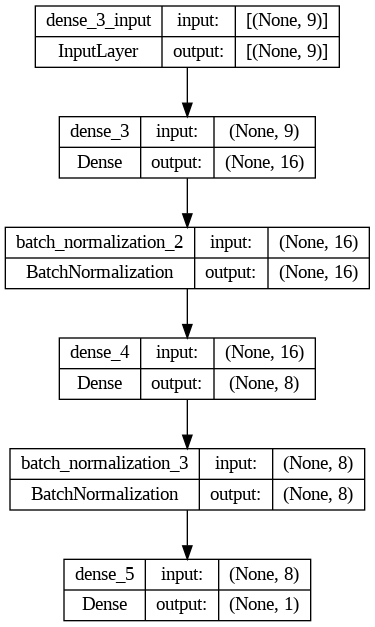

In [202]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

In [203]:
# Train the Model

%%time
history_seq = model_sequential.fit(train_pipe,
                                   epochs=50,
                                   validation_data=(val_pipe))

Epoch 1/100
418/418 [==============================] - 3s 3ms/step - loss: 0.7197 - accuracy: 0.5280 - val_loss: 0.6848 - val_accuracy: 0.5637
Epoch 2/100
418/418 [==============================] - 1s 2ms/step - loss: 0.6804 - accuracy: 0.5594 - val_loss: 0.6758 - val_accuracy: 0.5747
Epoch 3/100
418/418 [==============================] - 1s 3ms/step - loss: 0.6738 - accuracy: 0.5769 - val_loss: 0.6704 - val_accuracy: 0.5819
Epoch 4/100
418/418 [==============================] - 1s 2ms/step - loss: 0.6696 - accuracy: 0.5855 - val_loss: 0.6665 - val_accuracy: 0.5933
Epoch 5/100
418/418 [==============================] - 1s 2ms/step - loss: 0.6660 - accuracy: 0.5903 - val_loss: 0.6630 - val_accuracy: 0.5980
Epoch 6/100
418/418 [==============================] - 1s 2ms/step - loss: 0.6629 - accuracy: 0.5937 - val_loss: 0.6599 - val_accuracy: 0.6003
Epoch 7/100
418/418 [==============================] - 1s 2ms/step - loss: 0.6602 - accuracy: 0.5961 - val_loss: 0.6571 - val_accuracy: 0.6031

In [204]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.719656,0.527955,0.684829,0.563679
1,0.680422,0.559445,0.675766,0.574698
2,0.673849,0.576873,0.670362,0.581903
3,0.669562,0.585549,0.666459,0.593346
4,0.665998,0.590261,0.663003,0.598008
...,...,...,...,...
95,0.632468,0.614720,0.631301,0.613689
96,0.632489,0.614421,0.631452,0.613266
97,0.632477,0.614496,0.631415,0.613477
98,0.632441,0.614496,0.631347,0.613689


###Evaluation

<Axes: >

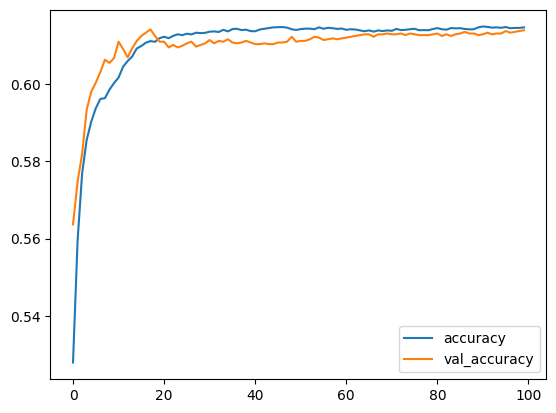

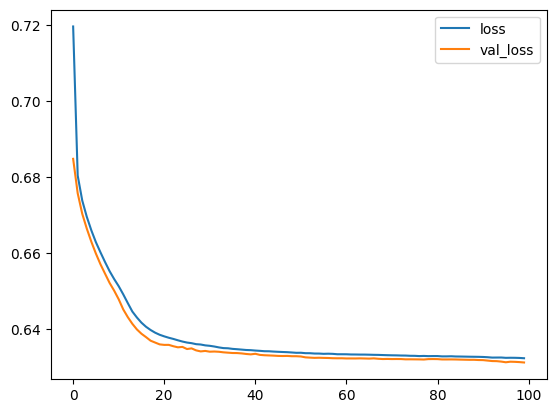

In [205]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

Based on the above graph, the results of the base model indicate the presence of the exploding gradient problem, where the loss value does not consistently decrease towards zero but can instead explode abruptly.

In [206]:
y_pred_seq_train = model_sequential.predict(X_train)
y_pred_seq_train = np.where(y_pred_seq_train >= 0.5, 1, 0)

print(classification_report(y_train, y_pred_seq_train))

836/836 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.18      0.30     12312
           1       0.59      0.99      0.74     14427

    accuracy                           0.62     26739
   macro avg       0.76      0.58      0.52     26739
weighted avg       0.74      0.62      0.54     26739



In [207]:
# Model Evaluation of test-set

from sklearn.metrics import classification_report

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

174/174 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.18      0.30      2524
           1       0.59      0.99      0.74      3028

    accuracy                           0.62      5552
   macro avg       0.76      0.58      0.52      5552
weighted avg       0.74      0.62      0.54      5552



This model is considered underfit because it exhibits low accuracy values and the accuracy remains unchanged between the training and test data.

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'batch_size': [16, 64],
    'epochs': [10, 30],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.3]
}

# Function to create the model
def create_model(hidden_units=64, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(hidden_units, activation='relu', input_shape=(11,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Create GridSearchCV with error_score='raise'
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, error_score='raise')

# Perform Grid Search
try:
    grid_result = grid_search.fit(X_train, y_train)
except ValueError as e:
    print("Error occurred during grid search:", e)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Error occurred during grid search: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/input_spec.py", line 298, in assert_input

<ipython-input-152-5809c6fa4a59>:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


In [153]:
print("Best Hyperparameters: ", grid_result.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_result.best_score_ * 100))

NameError: ignored

In [171]:
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [172]:
from tensorflow.keras.regularizers import l1, l2
# Model Definition Sequential API
model_sequential = Sequential()
model_sequential.add(Dense(32,activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed),input_shape=(9,))) # Hidden Layer 1
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(tf.keras.layers.Dropout(rate=0.2))
model_sequential.add(Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed),kernel_regularizer=l1(0.01))) # Hidden Layer 2
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(tf.keras.layers.Dropout(rate=0.2))
model_sequential.add(Dense(8,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 3
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(4,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(seed))) # Hidden Layer 4
model_sequential.add(tf.keras.layers.BatchNormalization())
model_sequential.add(Dense(1,activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))) # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='SGD',
                         metrics=['accuracy'])
model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 16)                0

In [173]:
# Train the Model

%%time
history_seq = model_sequential.fit(train_pipe,
                                   epochs=50,
                                   validation_data=(val_pipe))

Epoch 1/50
418/418 [==============================] - 5s 4ms/step - loss: 1.6950 - accuracy: 0.5290 - val_loss: 1.5709 - val_accuracy: 0.5666
Epoch 2/50
418/418 [==============================] - 1s 3ms/step - loss: 1.4855 - accuracy: 0.5430 - val_loss: 1.3887 - val_accuracy: 0.5815
Epoch 3/50
418/418 [==============================] - 2s 6ms/step - loss: 1.3144 - accuracy: 0.5579 - val_loss: 1.2313 - val_accuracy: 0.5847
Epoch 4/50
418/418 [==============================] - 2s 4ms/step - loss: 1.1681 - accuracy: 0.5654 - val_loss: 1.0965 - val_accuracy: 0.5891
Epoch 5/50
418/418 [==============================] - 1s 3ms/step - loss: 1.0464 - accuracy: 0.5665 - val_loss: 0.9846 - val_accuracy: 0.5953
Epoch 6/50
418/418 [==============================] - 1s 3ms/step - loss: 0.9438 - accuracy: 0.5757 - val_loss: 0.8933 - val_accuracy: 0.5950
Epoch 7/50
418/418 [==============================] - 1s 3ms/step - loss: 0.8623 - accuracy: 0.5815 - val_loss: 0.8224 - val_accuracy: 0.5993
Epoch 

In [174]:
# Create DataFrame

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,1.694959,0.529003,1.570866,0.566646
1,1.485538,0.542952,1.388657,0.581479
2,1.314425,0.557912,1.231262,0.584658
3,1.168117,0.565354,1.096505,0.589108
4,1.046372,0.566476,0.984571,0.595253
5,0.943831,0.575676,0.893314,0.595041
6,0.862269,0.581473,0.822358,0.599280
7,0.801161,0.582557,0.767398,0.603942
8,0.754792,0.585998,0.727582,0.603942
9,0.722104,0.587270,0.698228,0.608392


<Axes: >

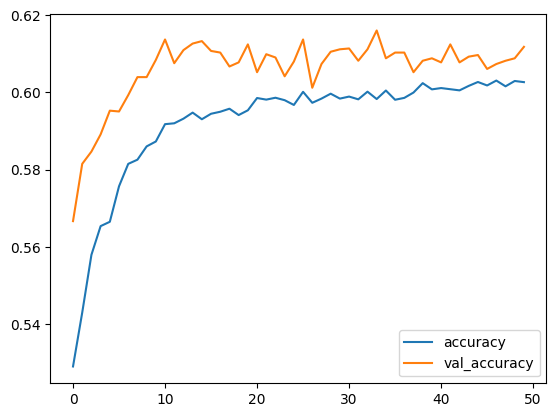

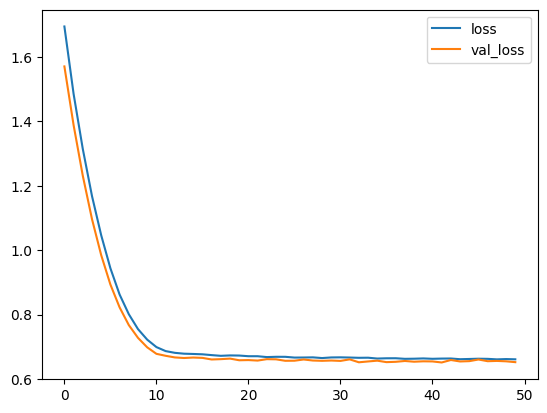

In [175]:
# Plot Training Results

history_seq_df[['accuracy', 'val_accuracy']].plot()
history_seq_df[['loss', 'val_loss']].plot()

In [176]:
y_pred_seq_train = model_sequential.predict(X_train)
y_pred_seq_train = np.where(y_pred_seq_train >= 0.5, 1, 0)

print(classification_report(y_train, y_pred_seq_train))

836/836 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.17      0.29     12312
           1       0.58      0.99      0.73     14427

    accuracy                           0.61     26739
   macro avg       0.75      0.58      0.51     26739
weighted avg       0.73      0.61      0.53     26739



In [177]:
# Model Evaluation of test-set

from sklearn.metrics import classification_report

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.17      0.29      2524
           1       0.59      0.99      0.74      3028

    accuracy                           0.62      5552
   macro avg       0.76      0.58      0.52      5552
weighted avg       0.74      0.62      0.54      5552



## Functional API

In [178]:
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [179]:
# Create Functional Model
input_layer = Input(shape=(11,))
hidden_layer_1 = Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(input_layer)
hidden_layer_2 = Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed))(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           192         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 8)            136         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 19)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

# Model Inference

In [211]:
data.columns

Index(['user_id', 'age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'age_category'],
      dtype='object')

In [179]:
# Create New Data
data_inf = {
    'user_id': '1224243ungjr',
    'age': 24,
    'gender': 'F',
    'region_category': 'City',
    'membership_category': 'No Membership',
    'joining_date': '2023-07-28',  # Replace with the actual joining date
    'joined_through_referral': 'Yes',
    'preferred_offer_types': 'Without Offers',
    'medium_of_operation': 'Desktop',
    'internet_option': 'Wi-Fi',
    'last_visit_time': 'YourLastVisitTime',
    'days_since_last_login': 10,
    'avg_time_spent': 30,
    'avg_transaction_value': 100,
    'avg_frequency_login_days': 5,
    'points_in_wallet': 200,
    'used_special_discount': 'Yes',
    'offer_application_preference': 'No',
    'past_complaint': 'No',
    'complaint_status': 'Not Applicable',
    'feedback': 'YourFeedback',
    'churn_risk_score': 3,
    'age_category': 'YourAgeCategory'
}

data_inf = pd.DataFrame([data_inf])
st.dataframe(data_inf)